In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "drive/MyDrive/CNN Stock Prediction"

[Errno 2] No such file or directory: 'drive/MyDrive/CNN Stock Prediction'
/content/drive/.shortcut-targets-by-id/11M8JhuGjMeTkxBAoI1sL3lLEa69ylHrV/CNN Stock Prediction


#Setup Data with Best Features

In [ ]:
import pandas as pd
stock = "IBM"
labeled_path = f"data/labeled_indicators/{stock}_all_labeled_indicators.csv"
df = pd.read_csv(labeled_path)

cleaned_df = df.drop(['Unnamed: 0'], axis=1)
cleaned_df = cleaned_df.dropna()
cleaned_df.head(50)

# drop non feature columns
cols_to_drop = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "adjustRatio"]
cleaned_df = cleaned_df.drop(cols_to_drop, axis = 1)

# drop last 5 rows
cleaned_df = cleaned_df.iloc[:-5, :]

cleaned_df.head() #(4971, 421) # 420 features + label column

,Label,RSI_ta_6,RSI_ta_7,RSI_ta_8,RSI_ta_9,RSI_ta_10,RSI_ta_11,RSI_ta_12,RSI_ta_13,RSI_ta_14,...,AWSM_ta_11,AWSM_ta_12,AWSM_ta_13,AWSM_ta_14,AWSM_ta_15,AWSM_ta_16,AWSM_ta_17,AWSM_ta_18,AWSM_ta_19,AWSM_ta_20
59,0,10.900907,13.984287,16.808864,19.335721,21.561469,23.502503,25.184977,26.638602,27.893021,...,-1.007045,-0.709792,-0.436346,-0.237143,0.036833,0.298906,0.521176,0.798333,1.004211,1.098000
60,1,6.896011,9.373318,11.775636,14.029307,16.097933,17.969272,19.645962,21.139139,22.464201,...,-1.432955,-1.107917,-0.837115,-0.604107,-0.379667,-0.099531,0.143529,0.447083,0.668553,0.848500
61,0,12.323443,14.017505,15.820532,17.601332,19.288652,20.847486,22.264740,23.540211,24.680870,...,-1.928409,-1.534792,-1.239038,-0.990536,-0.759667,-0.490469,-0.230147,0.055278,0.327368,0.557500
62,0,17.397102,18.306041,19.523081,20.849862,22.176042,23.441957,24.617978,25.692290,26.663413,...,-2.335227,-1.991875,-1.582308,-1.314821,-1.105833,-0.856562,-0.583971,-0.343889,0.013026,0.230875
63,0,39.974992,37.884477,36.745996,36.181767,35.963598,35.950929,36.056389,36.225617,36.425001,...,-2.545000,-2.361042,-1.959808,-1.593036,-1.354167,-1.152813,-0.869265,-0.620417,-0.345000,-0.025000


In [ ]:
# count labels
cleaned_df.Label.value_counts()

Label
0    4347
1     312
2     312
Name: count, dtype: int64

###Retrieve Data with Best Features

In [ ]:
import pandas as pd

stock = "IBM"
data_path = f"data/{stock}_selected_features.csv"
df = pd.read_csv(data_path)

df = df.drop(['Unnamed: 0'], axis=1)

df.head() #(225, 1)

,0
0,RSI_ta_6
1,RSI_ta_7
2,RSI_ta_8
3,RSI_ta_9
4,RSI_ta_10


In [ ]:
max_accuracy_features = df.T # transpose dataframe

headers = max_accuracy_features.iloc[0]
features = pd.DataFrame(max_accuracy_features.values[1:], columns=headers) # best feature columns (0, 225) shape

features.insert(0, "Label", "")

features.head()

0,Label,RSI_ta_6,RSI_ta_7,RSI_ta_8,RSI_ta_9,RSI_ta_10,RSI_ta_11,RSI_ta_12,RSI_ta_13,RSI_ta_14,...,AWSM_ta_7,AWSM_ta_8,AWSM_ta_9,AWSM_ta_10,AWSM_ta_11,AWSM_ta_12,AWSM_ta_13,AWSM_ta_14,AWSM_ta_15,AWSM_ta_16


In [ ]:
common_cols=list(set.intersection(set(cleaned_df), set(features)))
X_features = cleaned_df[common_cols]

# rearrange to keep the original order of feature columns
feats = X_features[list(features.columns)]

feats.shape

(4971, 226)

In [ ]:
# feats df contains features and label for all data
# feature columns
X = feats.iloc[:, feats.columns != 'Label']

# outcome column
y = feats.iloc[:, feats.columns == 'Label']

print("Shape of Features: ", X.values.shape)
print("Shape of Labels: ", y.values.shape)

X.head()

Shape of Features:  (4971, 225)
Shape of Labels:  (4971, 1)


,RSI_ta_6,RSI_ta_7,RSI_ta_8,RSI_ta_9,RSI_ta_10,RSI_ta_11,RSI_ta_12,RSI_ta_13,RSI_ta_14,RSI_ta_15,...,AWSM_ta_7,AWSM_ta_8,AWSM_ta_9,AWSM_ta_10,AWSM_ta_11,AWSM_ta_12,AWSM_ta_13,AWSM_ta_14,AWSM_ta_15,AWSM_ta_16
59,10.900907,13.984287,16.808864,19.335721,21.561469,23.502503,25.184977,26.638602,27.893021,28.975873,...,-1.797857,-1.737187,-1.515556,-1.30075,-1.007045,-0.709792,-0.436346,-0.237143,0.036833,0.298906
60,6.896011,9.373318,11.775636,14.029307,16.097933,17.969272,19.645962,21.139139,22.464201,23.638116,...,-2.159286,-2.083438,-1.968056,-1.74875,-1.432955,-1.107917,-0.837115,-0.604107,-0.379667,-0.099531
61,12.323443,14.017505,15.820532,17.601332,19.288652,20.847486,22.264740,23.540211,24.680870,25.697282,...,-2.343571,-2.408750,-2.348056,-2.19050,-1.928409,-1.534792,-1.239038,-0.990536,-0.759667,-0.490469
62,17.397102,18.306041,19.523081,20.849862,22.176042,23.441957,24.617978,25.692290,26.663413,27.535602,...,-2.513929,-2.540000,-2.587500,-2.48825,-2.335227,-1.991875,-1.582308,-1.314821,-1.105833,-0.856562
63,39.974992,37.884477,36.745996,36.181767,35.963598,35.950929,36.056389,36.225617,36.425001,36.634057,...,-2.506429,-2.553750,-2.599444,-2.66725,-2.545000,-2.361042,-1.959808,-1.593036,-1.354167,-1.152813


#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# train and test data
X_train_set, X_test, y_train_set, y_test = train_test_split(X.values, y.values, train_size=0.8,
                                                    test_size=0.2, random_state=2, shuffle=True,
                                                    stratify=y.values)

print(f"X_train_set shape: {X_train_set.shape}")
print(f"y_train_set shape: {y_train_set.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_set shape: (3976, 225)
y_train_set shape: (3976, 1)
X_test shape: (995, 225)
y_test shape: (995, 1)


In [ ]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print("y_test Class Distribution: ")
print(np.asarray((unique, counts)).T)

y_test Class Distribution: 
[[  0 870]
 [  1  63]
 [  2  62]]


In [ ]:
# split train into train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_set, y_train_set, train_size=0.8,
                                                    test_size=0.2, random_state=2, shuffle=True,
                                                    stratify=y_train_set)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (3180, 225)
y_train shape: (3180, 1)
X_val shape: (796, 225)
y_val shape: (796, 1)


In [ ]:
import numpy as np
unique, counts = np.unique(y_val, return_counts=True)
print("y_val Class Distribution: ")
print(np.asarray((unique, counts)).T)

y_val Class Distribution: 
[[  0 696]
 [  1  50]
 [  2  50]]


In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("y_train Class Distribution: ")
print(np.asarray((unique, counts)).T)

y_train Class Distribution: 
[[   0 2781]
 [   1  199]
 [   2  200]]


# Setup Test Input Images (Normalizing + Encoding)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# min max scalar
MM_SCALER = MinMaxScaler(feature_range=(-1, 1))

# One Hot Encode Labels
"""
0 -> [1, 0, 0]
1 -> [0, 1, 0]
2 -> [0, 0, 1]
"""

'\n0 -> [1, 0, 0]\n1 -> [0, 1, 0]\n2 -> [0, 0, 1]\n'

###Normalize Data

In [ ]:
X_train = MM_SCALER.fit_transform(X_train)
X_val = MM_SCALER.transform(X_val)
X_test = MM_SCALER.transform(X_test)

###Reshape Data into 15x15 Images

In [ ]:
X_train_images = X_train.reshape(X_train.shape[0], 15, 15)
X_val_images = X_val.reshape(X_val.shape[0], 15, 15)
X_test_images = X_test.reshape(X_test.shape[0], 15, 15)

print(f"X_train Images shape: {X_train_images.shape}")
print(f"X_val Images shape: {X_val_images.shape}")
print(f"X_test Images shape: {X_test_images.shape}")

X_train Images shape: (3180, 15, 15)
X_val Images shape: (796, 15, 15)
X_test Images shape: (995, 15, 15)


###Weights for Imbalanced Train Data

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(y_train, axis=1) # compute_class_weight needs int labels
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
d_class_weights = dict(enumerate(class_weights))

# y_integers = np.argmax(y_train, axis=1)  # compute_class_weight needs int labels
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
# sample_weights = y_integers.copy().astype(float)
# for i in np.unique(y_integers):
#   sample_weights[sample_weights == i] = class_weights[i]


###Encode Labels

In [ ]:
OHE = OneHotEncoder(sparse=False, categories='auto')

y_train = OHE.fit_transform(y_train.reshape(-1, 1)) # Reshapes to a column vector
y_val = OHE.transform(y_val.reshape(-1, 1))
y_test = OHE.transform(y_test.reshape(-1, 1))

y_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(3180, 3)

In [ ]:
print(f"X_train Images shape: {X_train_images.shape}")
print(f"y_train labels shape: {y_train.shape}\n")

print(f"X_val Images shape: {X_val_images.shape}")
print(f"y_val labels shape: {y_val.shape}\n")

print(f"X_test Images shape: {X_test_images.shape}")
print(f"y_test labels shape: {y_test.shape}\n")

X_train Images shape: (3180, 15, 15)
y_train labels shape: (3180, 3)

X_val Images shape: (796, 15, 15)
y_val labels shape: (796, 3)

X_test Images shape: (995, 15, 15)
y_test labels shape: (995, 3)



#CNN

###CNN Implementation

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

!pip install h5py

params = {
    "input_w": 15,
    "input_h": 15,
    "input_c": 1,
    "num_classes": 3,
    "batch_size": 1024,
    "epochs": 1000
    }

In [ ]:
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(params["input_w"], params["input_h"], params["input_c"])))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(params["num_classes"], activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy', 'mae', 'mse'])

###Model Checkpoint Callbacks

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback

best_model_path = "data/4_best_model_keras.h5"
es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1,
                   patience=100, min_delta=0.0001) # Stops the training early when validation loss stops improving, prevent overfitting

rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
                        min_delta=0.001, cooldown=1, min_lr=0.0001) # Adjusts Learning Rate on validation loss

mcp = ModelCheckpoint(best_model_path, monitor='val_accuracy', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='max', save_freq="epoch")  # val_f1_metric

###Train CNN

In [ ]:
# reshape input images to include a single channel to fit CNN Sequential Layer
X_train_images = np.expand_dims(X_train_images, axis=-1)
X_val_images = np.expand_dims(X_val_images, axis=-1)
X_test_images = np.expand_dims(X_test_images, axis=-1)

In [ ]:
print(f"X_train Images shape: {X_train_images.shape}")
print(f"y_train labels shape: {y_train.shape}\n")

print(f"X_val Images shape: {X_val_images.shape}")
print(f"y_val labels shape: {y_val.shape}\n")

print(f"X_test Images shape: {X_test_images.shape}")
print(f"y_test labels shape: {y_test.shape}\n")

X_train Images shape: (3180, 15, 15, 1)
y_train labels shape: (3180, 3)

X_val Images shape: (796, 15, 15, 1)
y_val labels shape: (796, 3)

X_test Images shape: (995, 15, 15, 1)
y_test labels shape: (995, 3)



In [ ]:
# train CNN
hist = model.fit(X_train_images, y_train,
          batch_size=params["batch_size"],
          epochs=params["epochs"],
          callbacks=[mcp, rlp],
          validation_data=(X_val_images, y_val),
          class_weight=d_class_weights,
          verbose=2)

Epoch 1/1000


InvalidArgumentError: Graph execution error:

Detected at node GatherV2 defined at (most recent call last):
<stack traces unavailable>
indices[19] = 2 is not in [0, 1)
	 [[{{node GatherV2}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_92665]

###Model Evaluation

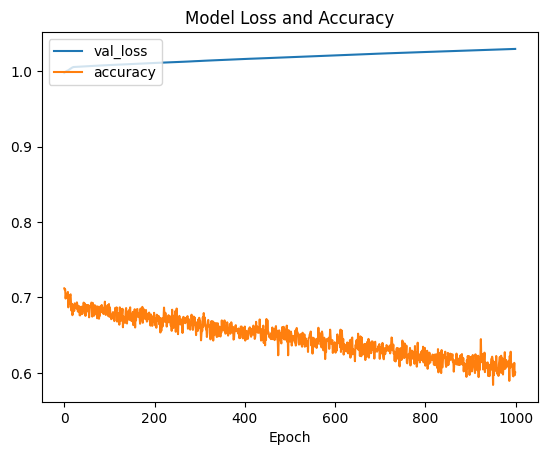

Model Accuracy: 0.6003144383430481
Model Validation Loss: 1.0294069051742554


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()

plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])

plt.title(f'Model Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'accuracy'], loc='upper left')

plt.show()

print("Model Accuracy:", hist.history['accuracy'][999])
print("Model Validation Loss:", hist.history['val_loss'][999])

###Test CNN

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# use model to make predictions on test data
y_predict = model.predict(X_test_images)
y_predict = np.argmax(y_predict, axis=1)
y_true = np.argmax(y_test, axis=0)

rounded_labels = np.argmax(y_test, axis=1) # convert label to single-digit

cm = confusion_matrix(rounded_labels, y_predict)
print(cm)
print(classification_report(rounded_labels, y_predict))


32/32 [==============================] - 0s 6ms/step
[[498  49 323]
 [ 56   2   5]
 [ 18   1  43]]
              precision    recall  f1-score   support

           0       0.87      0.57      0.69       870
           1       0.04      0.03      0.03        63
           2       0.12      0.69      0.20        62

    accuracy                           0.55       995
   macro avg       0.34      0.43      0.31       995
weighted avg       0.77      0.55      0.62       995

